# ORDerly args decisions

In [16]:
# imports
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

## Experimentation

In [7]:
path = '/Users/dsw46/Projects_local/ORDerly/data/orderly/unfiltered/uspto_no_trust/orderly_ord.parquet'
df = pd.read_parquet(path)

In [8]:
def columns_start_with(df, prefix):
    return [col for col in df.columns if col.startswith(prefix)] # e.g. "agent", "solvent", "reagent", "catalyst"

In [13]:
def count_strings(df):
    string_counts = []
    for col in tqdm(df.columns):
        count = df[col].apply(lambda x: isinstance(x, str)).sum()
        string_counts.append(count)
    return string_counts

In [14]:
reactant_cols = columns_start_with(df, 'reactant')
reactant_df = df[reactant_cols]
reactant_counts = count_strings(reactant_df)

100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


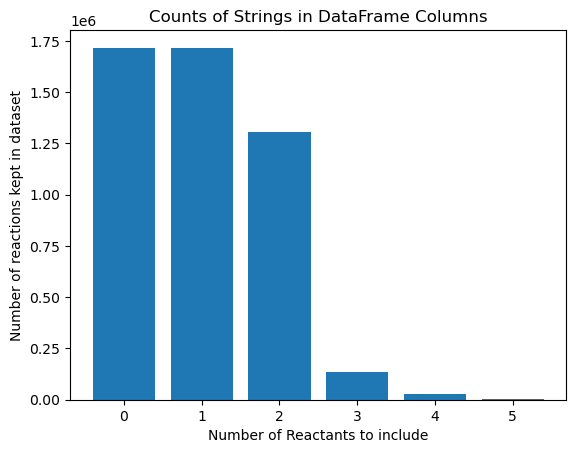

In [21]:
reactant_plot_list = reactant_counts[:5]
reactant_plot_list = [len(df)] + reactant_plot_list
# create a bar plot of string counts for each column
plt.bar(range(len(reactant_plot_list)), reactant_plot_list)

# set the x-axis tick labels to the column names
#plt.xticks(range(len(reactant_counts)), rotation=90)

# set the plot title and axis labels
plt.title('Counts of Strings in DataFrame Columns')
plt.xlabel('Number of Reactants to include')
plt.ylabel('Number of reactions kept in dataset')

# display the plot
plt.show()


## Writing a class

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

class StringCountsPlotter:
    def __init__(self, df, col_starts_with, figure_file_path):
        self.df = df
        self.col_starts_with = col_starts_with
        self.figure_file_path = figure_file_path
        self.string_counts = None
        self.columns_to_plot = None
        
    def _get_columns_to_plot(self):
        cols = [col for col in self.df.columns if col.startswith(self.col_starts_with)]

        return cols
    
    def _count_strings(self, df):
        string_counts = []
        for col in tqdm(df.columns):
            count = df[col].apply(lambda x: isinstance(x, str)).sum()
            string_counts.append(count)
        return string_counts
    
    def plot_string_counts(self):
        # clear the figure
        plt.clf()
        col_subset = self._get_columns_to_plot()
        df_subset = self.df[col_subset]
        counts = self._count_strings(df_subset)
        counts = [len(self.df)] + counts
        
        plotting_subset = counts[:10]
        # create a bar plot of string counts for each column
        plt.bar(range(len(plotting_subset)), plotting_subset)

        # set the x-axis tick labels to the column names
        #plt.xticks(range(len(self.columns_to_plot)), self.columns_to_plot, rotation=90)

        # set the plot title and axis labels
        plt.title(f'Counts of Strings in DataFrame Columns starting with "{self.col_starts_with}"')
        plt.ylabel('Number of reactions kept in dataset')
        plt.xlabel(f'Number of {self.col_starts_with} to include')

        # save the plot to file
        plt.savefig(self.figure_file_path, bbox_inches='tight')


100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


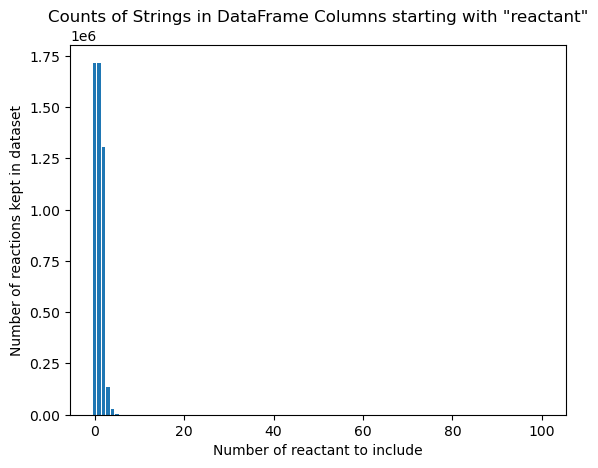

In [32]:
instance = StringCountsPlotter(df, 'reactant', '/Users/dsw46/Projects_local/ORDerly/notebooks/reactant_counts.png')
instance.plot_string_counts()

100%|██████████| 100/100 [00:22<00:00,  4.53it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 100/100 [00:22<00:00,  4.54it/s]


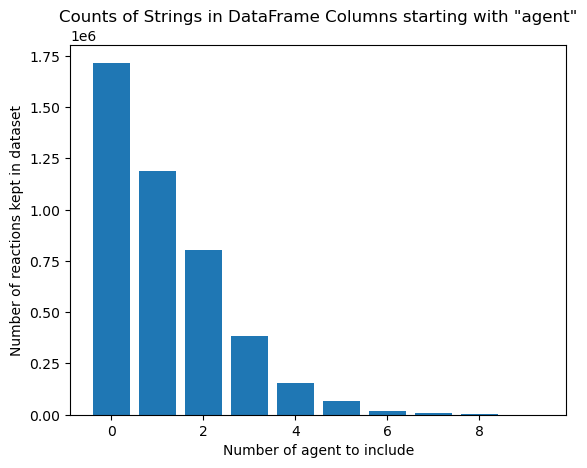

In [36]:
for molecule in ['reactant', 'product', 'solvent', 'catalyst', 'reagent', 'agent']:
    instance = StringCountsPlotter(df, molecule, f'/Users/dsw46/Projects_local/ORDerly/data/orderly/unfiltered/uspto_no_trust/plots/{molecule}_counts.png')
    instance.plot_string_counts()

In [ ]:
expected_filtered_df['reactant_002']

In [ ]:
filtered_df['reactant_002']

In [2]:
import pandas as pd
df = pd.read_parquet('/Users/dsw46/Downloads/cleaned orderly data copies/unfiltered/uspto_no_trust/orderly_ord.parquet')

In [3]:
df.head()

,agent_000,agent_001,agent_002,agent_003,agent_004,agent_005,agent_006,agent_007,agent_008,agent_009,...,yield_090,yield_091,yield_092,yield_093,yield_094,yield_095,yield_096,yield_097,yield_098,yield_099
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,None,None,None,None,None,None,None,None,None,None
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,None,None,None,None,None,None,None,None,None,None
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,None,None,None,None,None,None,None,None,None,None
3,[Fe],[Na+],[OH-],<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,None,None,None,None,None,None,None,None,None,None
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,None,None,None,None,None,None,None,None,None,None


In [5]:
type(df.iloc[0]['reactant_002'])

pandas._libs.missing.NAType